In [1]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%matplotlib inline

In [112]:
def strategy(ticker, start='2009-01-01', stop='2017-01-01', window=5):
    stock = pdr.get_data_google(ticker, start=start, end=stop)
    stock['high'] = stock.Close.shift(1).rolling(window=window).max()
    stock['low'] = stock.Close.shift(1).rolling(window=window).min()
    stock['avg'] = stock.Close.shift(1).rolling(window=window).mean()
    
    stock['long_entry'] = stock.High > stock.high
    stock['short_entry'] = stock.Low < stock.low
    
    stock['long_exit'] = stock.Low < stock.avg
    stock['short_exit'] = stock.High > stock.avg
    
    stock['positions_long'] = np.nan
    stock.loc[stock.long_entry, 'positions_long'] = 1
    stock.loc[stock.long_exit, 'positions_long'] = 0
    
    stock['positions_short'] = np.nan
    stock.loc[stock.short_entry, 'positions_short'] = -1
    stock.loc[stock.short_exit, 'positions_short'] = 0
    
    stock = stock.fillna(method='ffill')
    stock['Signal'] = stock.positions_long + stock.positions_short
    
    return stock

In [123]:
def performance(stock:pd.DataFrame):
    daily_log_returns = np.log(stock.Close/stock.Close.shift(1))
    daily_log_returns = daily_log_returns * stock.Signal.shift(1)
    daily_log_returns.dropna(inplace=True)
    
    sns.distplot(daily_log_returns, bins=50)
    cumsum = daily_log_returns.cumsum()
    return cumsum

In [119]:
stock = strategy('AAPL', window=20)

In [120]:
stock.tail(50)

,Open,High,Low,Close,Volume,high,low,avg,long_entry,short_entry,long_exit,short_exit,positions_long,positions_short,Signal
Date,,,,,,,,,,,,,,,
2016-10-20,116.86,117.38,116.33,117.06,24125801,117.63,112.18,114.7720,False,False,False,True,0.0,0.0,0.0
2016-10-21,116.81,116.91,116.28,116.60,23192665,117.63,112.18,114.8940,False,False,False,True,0.0,0.0,0.0
2016-10-24,117.10,117.74,117.00,117.65,23538673,117.63,112.18,115.0885,True,False,False,True,1.0,0.0,1.0
2016-10-25,117.95,118.36,117.31,118.25,48128970,117.65,112.18,115.3270,True,False,False,True,1.0,0.0,1.0
2016-10-26,114.31,115.70,113.31,115.59,66134219,118.25,112.18,115.5850,False,False,True,True,0.0,0.0,0.0
2016-10-27,115.39,115.86,114.10,114.48,34562045,118.25,112.18,115.6670,False,False,True,True,0.0,0.0,0.0
2016-10-28,113.87,115.21,113.45,113.72,37861662,118.25,112.52,115.7820,False,False,True,False,0.0,0.0,0.0
2016-10-31,113.65,114.23,113.20,113.54,26419398,118.25,112.52,115.8155,False,False,True,False,0.0,0.0,0.0
2016-11-01,113.46,113.77,110.53,111.49,43825812,118.25,113.00,115.8665,False,True,True,False,0.0,-1.0,-1.0


Date
2009-02-04    0.006006
2009-02-05    0.036959
2009-02-06    0.070498
2009-02-09    0.097498
2009-02-10    0.051369
2009-02-11    0.040581
2009-02-12    0.065573
2009-02-13    0.064868
2009-02-17    0.016431
2009-02-18    0.016431
2009-02-19    0.016431
2009-02-20    0.016431
2009-02-23    0.062072
2009-02-24    0.024928
2009-02-25    0.014893
2009-02-26    0.036633
2009-02-27    0.035065
2009-03-02    0.050863
2009-03-03    0.046097
2009-03-04    0.014893
2009-03-05    0.040566
2009-03-06    0.080764
2009-03-09    0.107366
2009-03-10    0.042932
2009-03-11    0.042932
2009-03-12    0.042932
2009-03-13    0.042932
2009-03-16    0.042932
2009-03-17    0.086714
2009-03-18    0.104808
                ...   
2016-11-17    4.409798
2016-11-18    4.408798
2016-11-21    4.408798
2016-11-22    4.408798
2016-11-23    4.408798
2016-11-25    4.408798
2016-11-28    4.408798
2016-11-29    4.408798
2016-11-30    4.400329
2016-12-01    4.400329
2016-12-02    4.400329
2016-12-05    4.400329
2016-1

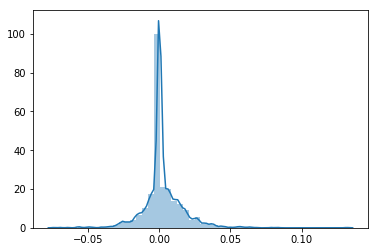

In [121]:
performance(stock)

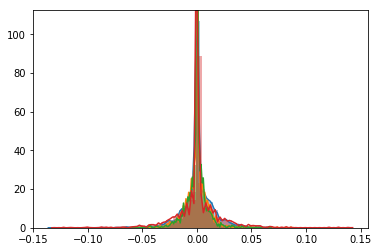

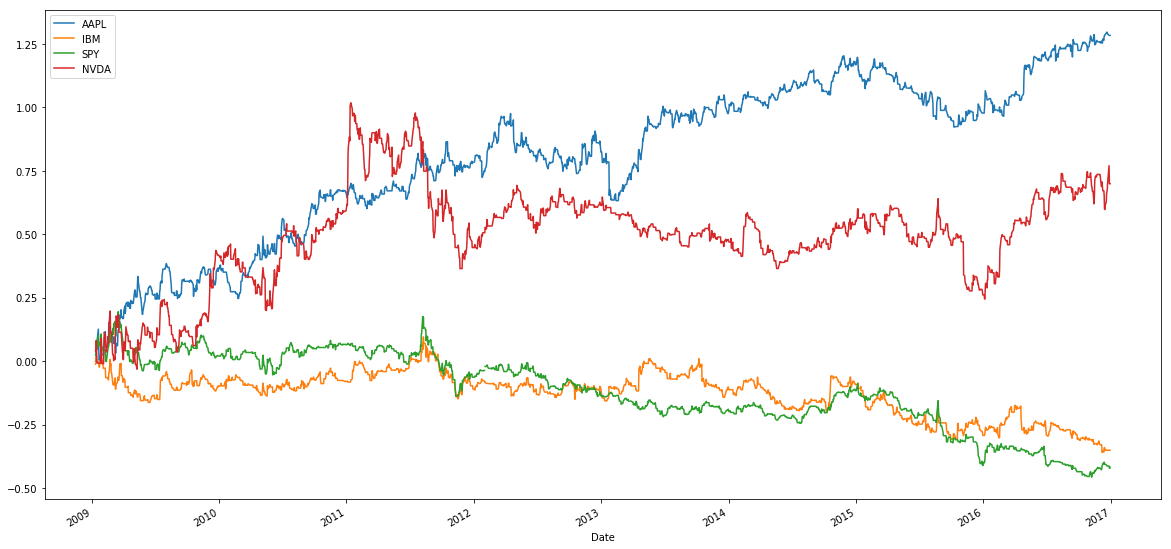

In [126]:
portfolio = ['AAPL', 'IBM', 'SPY', 'NVDA']
cum_daily_return = pd.DataFrame()
for stock in portfolio:
    cum_daily_return[stock] = performance(strategy(stock, window=5))
    
cum_daily_return.plot(figsize=(20,10))